# Genre Prediction - Exploratory Data Analysis<a id='EDA'></a>

## Contents<a id='Contents'></a>
* [Exploratory Data Analysis](#EDA)
  * [Contents](#Contents)
    * [Imports](#Imports)
    * [Load Data](#LoadData)
    * [Distributions of Dataset Features](#Distributions)
      * [Release Year](#ReleaseYear)
      * [Song Duration](#SongDuration)
      * [Mode](#Mode)
      * [Audio Features](#AudioFeatures)
    * [Relationships between Dataset Features](#Relationships)
      * [Pairplot](#Pairplot)
      * [Heatmap](#Heatmap)
    * [Dataset Features by Genre](#FeaturesByGenre)
      * [Averages of Dataset Features by Genre](#AveragesByGenre)
        * [Popularity](#PopularityAverages)
        * [Song Duration](#DurationAverages)
        * [Tempo](#TempoAverages)
        * [Mode](#ModeAverages)
        * [Audio Features](#FeatureAverages)
      * [Distributions of Dataset Features by Genre](#DistributionsByGenre)
        * [Pop](#Pop)
        * [R&B](#R&B)
        * [Hip Hop](#HipHop)
        * [Latin](#Latin)
        * [Reggae](#Reggae)
        * [EDM](#EDM)
        * [Indie](#Indie)
        * [Rock](#Pop)
        * [Metal](#Metal)
        * [Country](#Country)
        * [Jazz](#Jazz)
        * [Classical](#Classical)
    * [Clustering](#Clustering)
    * [Hypothesis Testing](#HypothesisTesting)
      * [Rock vs Country](#RockCountry)
      * [Rock vs Metal](#RockMetal)
      * [Rap vs R&B](#RapR&B)
      * [Pop vs Rock](#PopRock)
      * [Pop vs Rap](#PopRap)
      * [Pop vs Latin](#PopLatin)
      * [Pop vs Indie](#PopIndie)
      * [Pop vs Country](#PopCountry)
    * [Conclusion](#Conclusion)

### Imports<a id='Imports'></a>

In [15]:
import os
import math
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Load Data<a id='Load Data'></a>

In [16]:
df = pd.read_csv('audio_features.csv')
df.head()

track_id                      track          artist  \
0  0prNGof3XqfTvNDxHonvdK    Scars To Your Beautiful    Alessia Cara   
1  1rfofaqEpACxVEHIZBJe6W  Havana (feat. Young Thug)  Camila Cabello   
2  4l0Mvzj72xxOpRrp6h8nHi        Lose You To Love Me    Selena Gomez   
3  6T6D9CIrHkALcHPafDFA6L                      Vibez            ZAYN   
4  15og0pCEcTFWEXOFKdcJlU                    Hate Me  Ellie Goulding   

                  album release_date genre subgenre  duration_ms  popularity  \
0  Know-It-All (Deluxe)   2015-01-01   pop      pop       230226          73   
1                Camila   2018-01-01   pop      pop       217306          80   
2                  Rare   2020-01-01   pop      pop       206458          83   
3   Nobody Is Listening   2021-01-01   pop      pop       163346          73   
4        Brightest Blue   2020-01-01   pop      pop       188066          68   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.573  ...     0.282499        0.0285          0.000000     0.111   
1         0.765  ...     0.020387        0.1840          0.000036     0.132   
2         0.488  ...     0.056394        0.5560          0.000000     0.210   
3         0.643  ...     0.163887        0.2410          0.017800     0.120   
4         0.640  ...     0.111464        0.0875          0.000000     0.147   

   valence    tempo  mode  release_year  duration_min  duration_minsec  
0   0.4510   97.085     1          2015      3.837100        3 m, 50 s  
1   0.3940  104.988     1          2018      3.621767        3 m, 37 s  
2   0.0978  102.819     1          2020      3.440967        3 m, 26 s  
3   0.2970   96.924     1          2021      2.722433        2 m, 43 s  
4   0.7620   75.018     1          2020      3.134433         3 m, 8 s  

[5 rows x 22 columns]

## Distributions of Dataset Features<a id='Distributions'></a>

**Release Years**<a id='Release Years'></a>

The distribution of Release Years is highly skewed left, which is somewhat expected due to the fact that the playlists from which these songs were collected from are constantly updated. However, this may also suggest that the subgenres chosen to represent each major genre are relatively young and may not accurately represent the full scope of a genre over its lifespan.

Summary Statistics:
 count    14400.000000
mean      2004.038958
std         15.901712
min       1899.000000
25%       1996.000000
50%       2009.000000
75%       2017.000000
max       2021.000000
Name: release_year, dtype: float64

Count per Year:
 2020    1727
2019     841
2018     683
2017     597
2016     500
2014     489
2015     443
2013     410
2007     399
2011     374
2009     358
2012     353
2006     350
2010     343
2005     341
2008     331
2004     303
1999     274
2002     265
1998     242
Name: release_year, dtype: int64


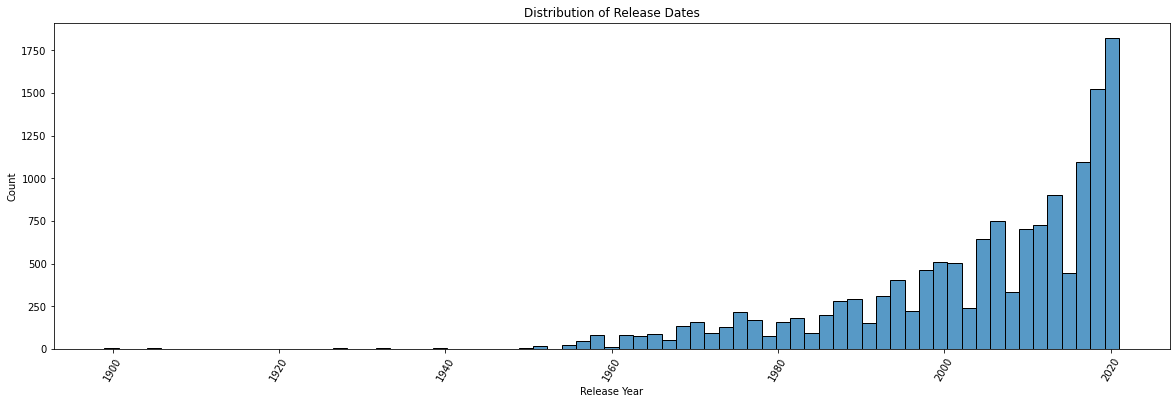

In [17]:
print('Summary Statistics:\n', df.release_year.describe())
print('\nCount per Year:\n', df.release_year.value_counts().head(20))

plt.figure(figsize=(20, 6))
plt.title('Distribution of Release Dates')
plt.xlabel('Release Year')
plt.xticks(rotation=60)
sns.histplot(df.release_year)
plt.show()

**Song Duration**<a id='Song Duration'></a>

The distribution of Track Lengths is skewed right, as one might expect due to vast amount of large outliers (long songs). Although the distribution still resembles a bell-curve, a Shapiro-Wilk Test for Normality indicates that the distribution is not Gaussian after all.

Summary Statistics:
 count    14400.000000
mean         4.195362
std          1.566816
min          0.651333
25%          3.250000
50%          3.826025
75%          4.648600
max         19.616667
Name: duration_min, dtype: float64

Shapiro-Wilk Test for Normality:  0.789787769317627


C:\Users\colel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


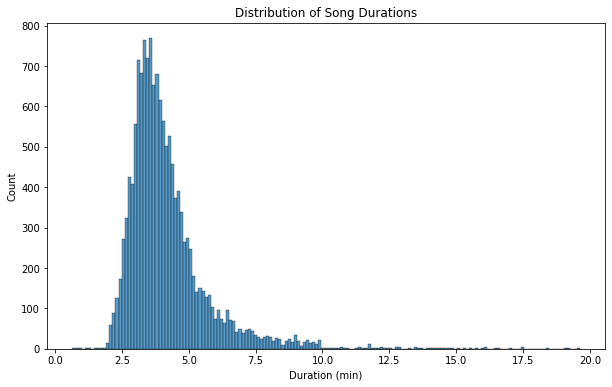

In [18]:
print('Summary Statistics:\n', df.duration_min.describe())
print('\nShapiro-Wilk Test for Normality: ', stats.shapiro(df.duration_min)[0])

plt.figure(figsize=(10,6))
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (min)')
sns.histplot(df.duration_min)
plt.show()

**Mode**<a id='Mode'></a>

About 63.7% (5350/8400) songs have a major key progression while the remaining 36.3% of songs are minor.

Count by Key Type:
 1    9134
0    5266
Name: mode, dtype: int64


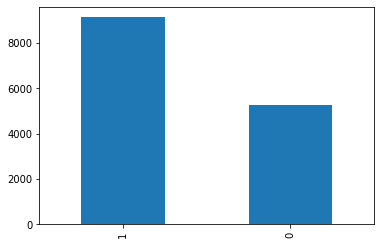

In [19]:
print('Count by Key Type:\n', df['mode'].value_counts())

df['mode'].value_counts().plot(kind='bar')
plt.show()

**Audio Features**<a id='Audio Features'></a>

The data definition, summary statistics, and distributions of each audio feature are displayed below.

danceability :  How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

energy :  A perceptual measure of intensity and activity on a scale of 0.0 to 1.0 . Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

loudness :  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

speechiness :  Detects the presence of spoken words in a track. The more

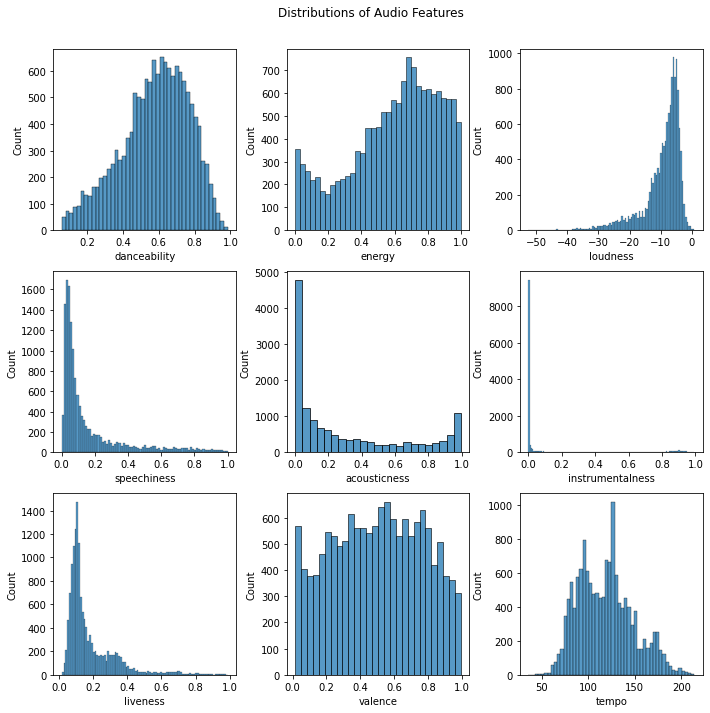

In [20]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']
data_def = pd.read_csv('data_definitions.csv', index_col=0)
for ind in audio_features:
    print(ind, ': ', data_def.loc[ind]['definition'], '\n')
af = df[audio_features]
print('Summary Statistics:\n', af.describe())

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle('Distributions of Audio Features')
fig.tight_layout(pad=2.0)
for i, column in enumerate(df.columns[9:18]):
    sns.histplot(df[column],ax=axes[i//3,i%3])
plt.show()

## Relationships between Dataset Features<a id='Relationships'></a>

#### Pairplot<a id='Pairplot'></a>

The relationships between each of the above features is displayed below.

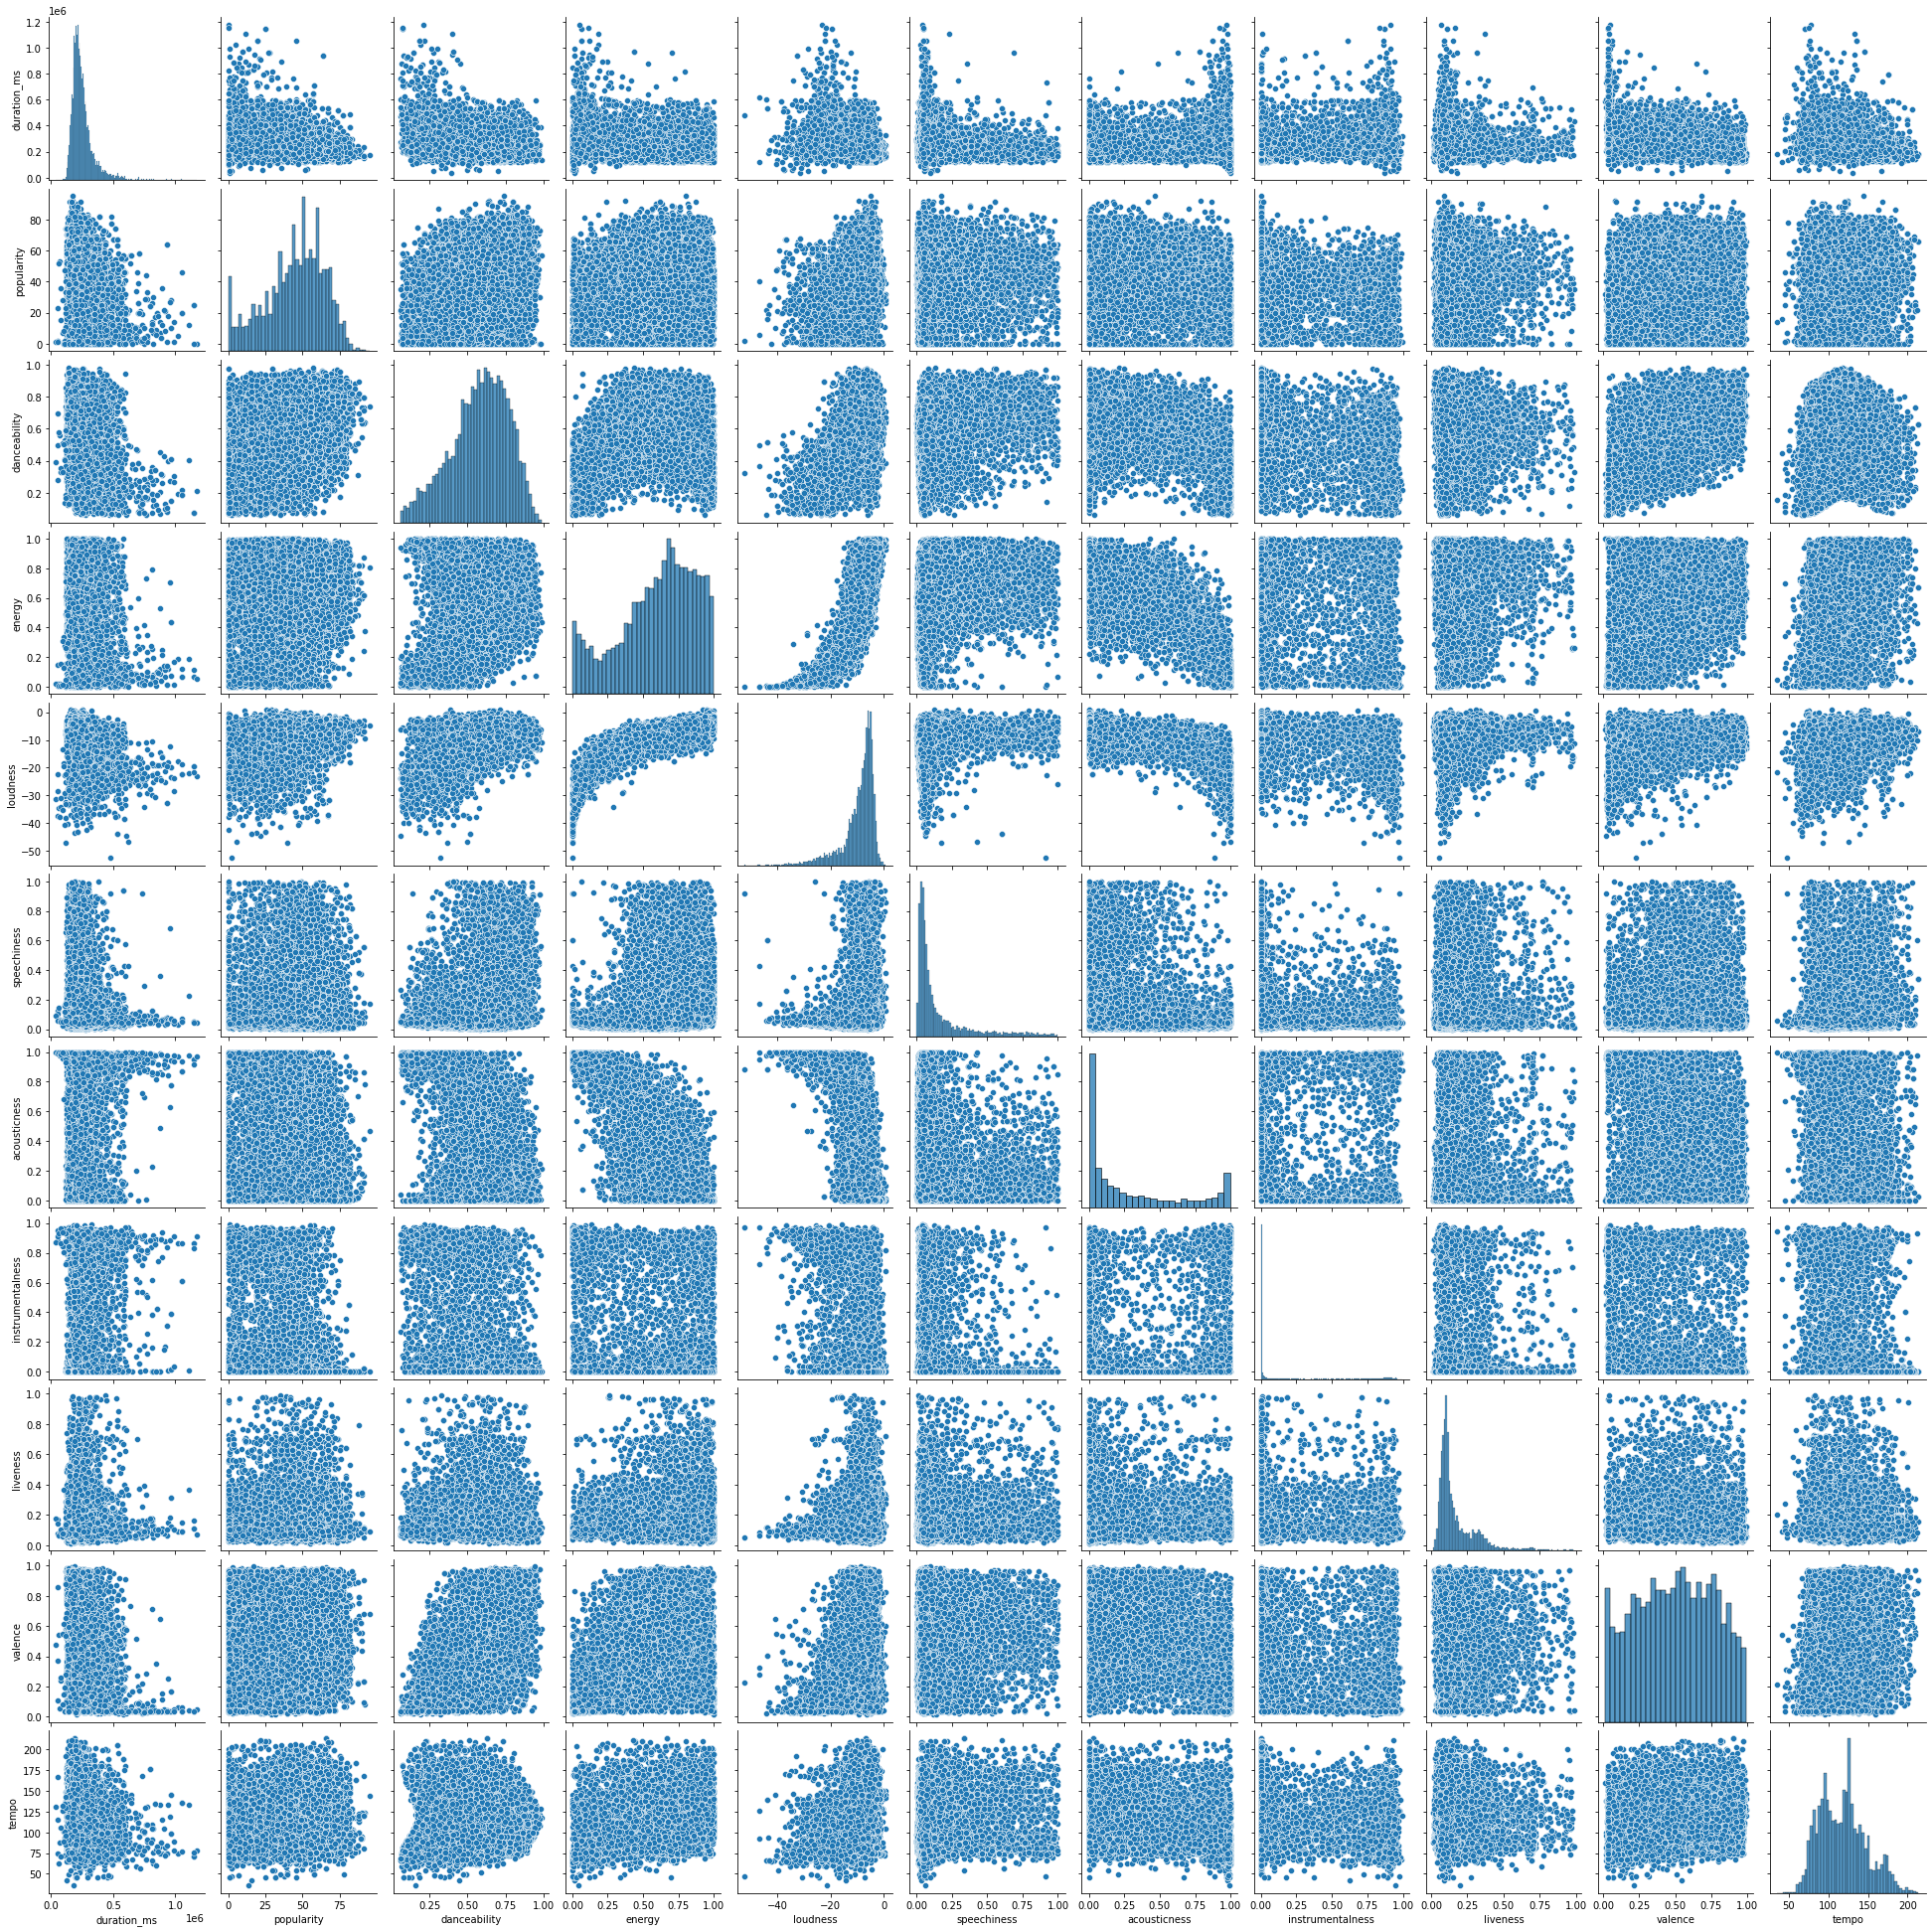

In [21]:
sns.pairplot(df.iloc[:,7:18])

#### Heatmap<a id='Heatmap'></a>

The correlations between each of the above features is displayed below.

<AxesSubplot:>

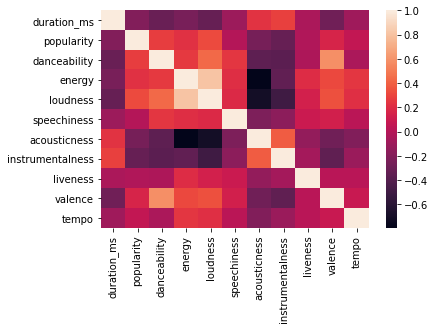

In [22]:
sns.heatmap(df.iloc[:,7:18].corr())

#### Energy vs Loudness

Energy and Loudness exhibit the strongest relationship between any of the above features. It makes intuitive sense that subjectively more energetic songs would tend to be louder on average. 

Pearson Correlation:  0.8177620889517226


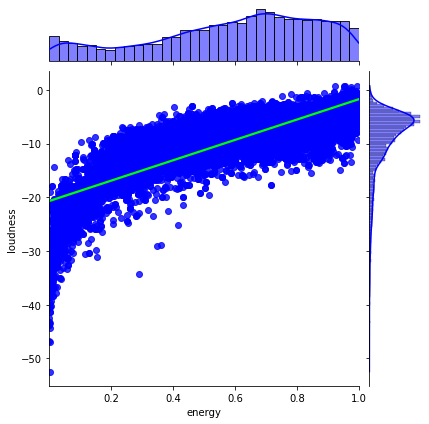

In [23]:
print('Pearson Correlation: ', stats.pearsonr(df.energy, df.loudness)[0])
#sns.scatterplot(x=df.energy, y=df.loudness, ax=ax[0])
sns.jointplot(x='energy', y='loudness', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

#### Danceability vs Valence

Another moderate correlation exists between Danceability and Valence. Although their relationship expresses far more variability than that of as that of Energy and Loudness, there is clearly a positive association between a song's suitability for dancing and its overall positivity.

Pearson Correlation:  0.5823141248948691


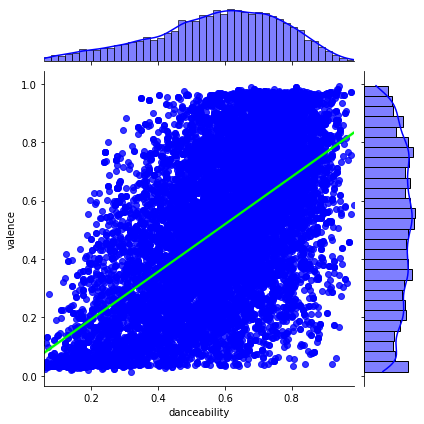

In [24]:
print('Pearson Correlation: ', stats.pearsonr(df.danceability, df.valence)[0])
sns.jointplot(x='danceability', y='valence', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

## Dataset Features by Genre<a id='FeaturesByGenre'></a>

In [25]:
genre_colors = pd.Series(['red', 'orange', 'gold', 'green', 'lightblue', 'blue',
                          'violet', 'purple', 'brown', 'tan', 'olive', 'silver'],
                        index=['pop', 'r&b', 'hip hop', 'latin', 'edm', 'reggae',
                               'indie','rock','metal', 'country', 'jazz', 'classical'])

### Averages of Dataset Features by Genre<a id='AveragesByGenre'></a>

#### Popularity<a id='PopularityAverages'></a>

The most popular genres are Rock, Pop, and Latin. Classical, Jazz, and Reggae are significantly less popular, perhaps due to the fact that they are relatively outdated comparatively to the modern major genres.

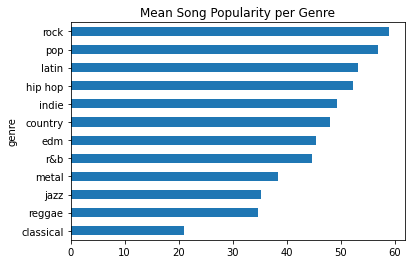

In [26]:
df.groupby('genre').popularity.mean().sort_values().plot(kind='barh')
plt.title('Mean Song Popularity per Genre')
plt.show()

#### Song Duration<a id='DurationAverages'></a>

The genres with the lowest mean song duration were Pop, Country, and Reggae, in that order. Classical and Jazz songs are significantly longer on average than those of other major genres.

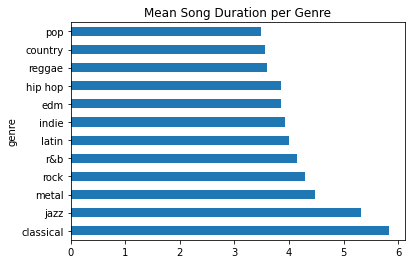

In [27]:
df.groupby('genre').duration_min.mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Mean Song Duration per Genre')
plt.show()

#### Tempo<a id='TempoAverages'></a>

The genres with the highest tempos on average are EDM, Metal, and Country, in that order.

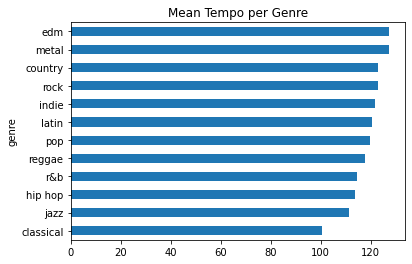

In [28]:
df.groupby('genre').tempo.mean().sort_values().plot(kind='barh')
plt.title('Mean Tempo per Genre')
plt.show()

#### Mode<a id='ModeAverages'></a>

The amount of songs with major and minor modes for each genre are displayed below. The only genre with more minor songs than major songs is R&B.

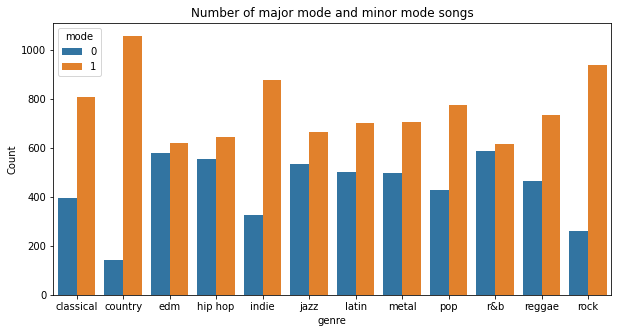

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre', y='track_id', hue='mode', data=df.groupby(['genre', 'mode']).track_id.count().reset_index())
plt.title('Number of major mode and minor mode songs')
plt.ylabel('Count')
plt.show()

#### Audio Features<a id='FeatureAverages'></a>

The average values for each genres' audio features are displayed below.

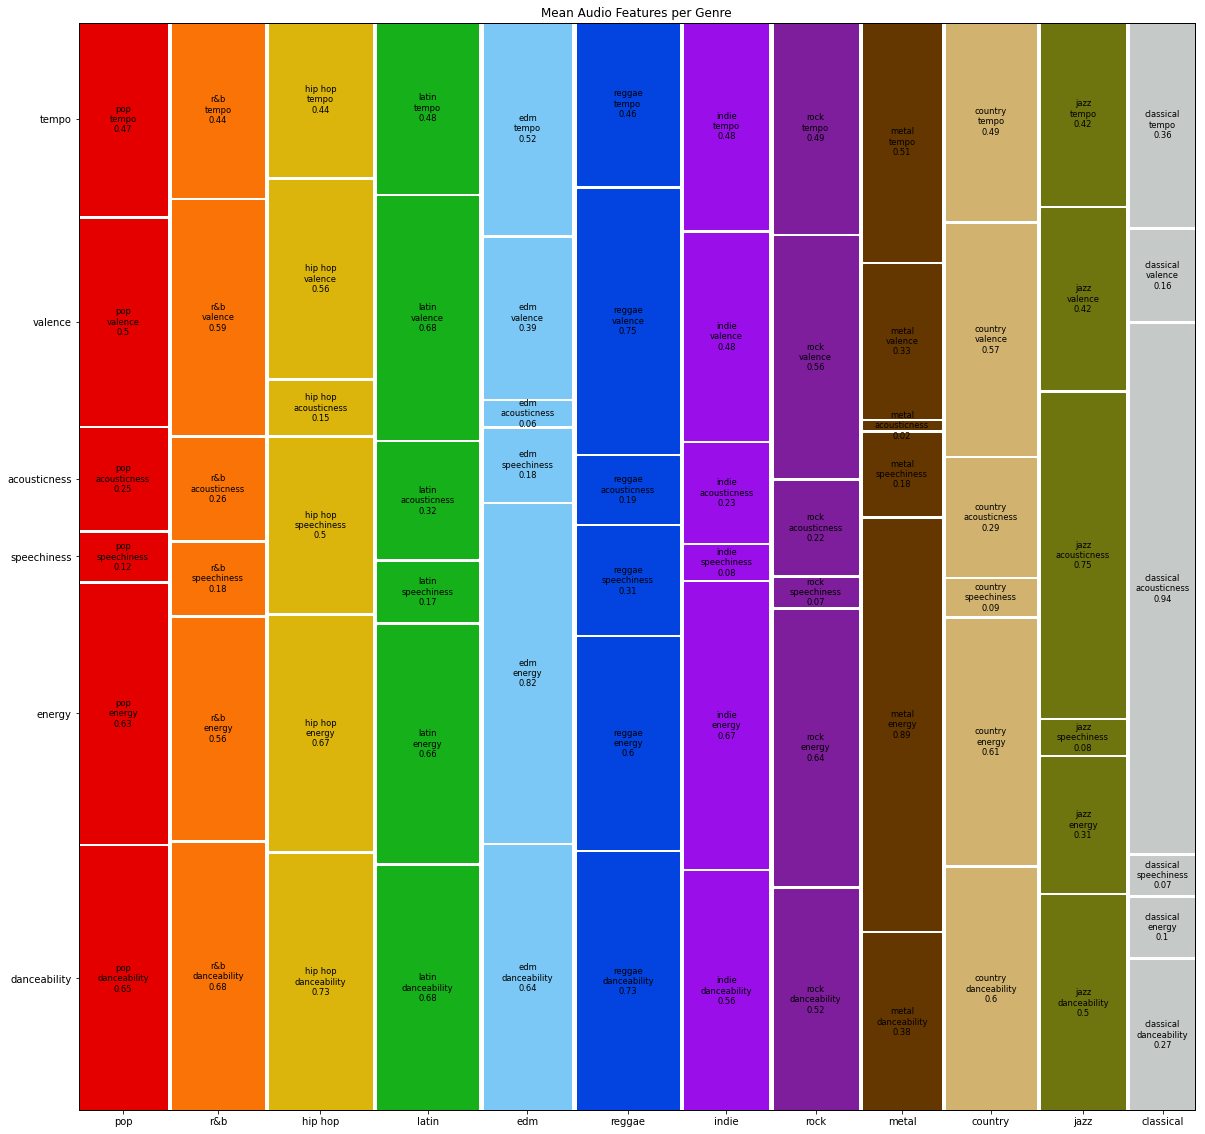

In [30]:
af = df.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo', 'genre']]
af['tempo'] = af[['tempo']].apply(lambda x: (x-min(x))/(max(x)-min(x))) # normalize tempo
af_means = af.groupby('genre').mean().reindex(index=genre_colors.index)
tuples = list(product(af_means.index.values, af_means.columns.values))
index = pd.MultiIndex.from_tuples(tuples, names=['genres', 'audio features'])
data = pd.Series([val for row in af_means.values for val in row], index=index)
#labelizer = val.index+' '+val._name+' '+str(val) for row in      ####    lambda k: "\n".join(k)
props = dict(zip(tuples, [{'color':'xkcd:'+genre_colors[tup[0]]} for tup in tuples]))
mosaic(data, title='Mean Audio Features per Genre', properties=props,
       labelizer=lambda k: "\n".join(k) + '\n' + str(round(af_means[k[1]][k[0]], 2)))[0]
plt.gcf().set_size_inches(20,20)
plt.show()

### Distributions of Dataset Features by Genre<a id='DistributionsByGenre'></a>

Helper functions for visualizing data distributions:

In [31]:
def radar_chart(values, labels, color='red'):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=color, linewidth=1)
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles)[:-1], labels)
    for label, angle in zip(ax.get_xticklabels(), angles):
      if angle in (0, np.pi):
        label.set_horizontalalignment('center')
      elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
      else:
        label.set_horizontalalignment('right')
    ax.set_ylim(0, 1)
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_rlabel_position(180 / len(labels))
    ax.tick_params(colors='#222222')
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(color='#AAAAAA')
    ax.spines['polar'].set_color('#222222')
    ax.set_facecolor('#FAFAFA')

def visualize_genre(data, color='white'):
    # Histograms of the distributions of release years, song durations, tempos, and loudness
    fig1, axes1 = plt.subplots(1,5, figsize=(10, 4))
    plt.tight_layout()
    fig.suptitle(data.genre.unique()[0].capitalize())
    sns.histplot(x=data.release_year, ax=axes1[0], color=color)
    sns.histplot(x=data.duration_min, ax=axes1[1], color=color)
    sns.histplot(x=data.tempo, ax=axes1[2], color=color)
    sns.histplot(x=data.loudness, ax=axes1[3], color=color)
    data['mode'].value_counts().plot(kind='bar', ax=axes1[4], color=color)
    # Violin plots of the distributions of audio features
    features = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo', 'genre']
    plt.subplots_adjust(top=0.85)
    fig2, axes2 = plt.subplots(1,6, figsize=(10, 4))
    plt.tight_layout()
    for i, column in enumerate(features[:-1]):
        sns.violinplot(x=data[column], ax=axes2[i], color=color)
        if(column!='tempo'):
            axes2[i].set_xlim(0, 1)
    # Radar charts of the means of audio features
    af = data.loc[:,features]
    af['tempo_norm'] = af[['tempo']].apply(lambda x: (x-min(x))/(max(x)-min(x)))
    af.drop('tempo', axis=1, inplace=True)
    af_means = af.groupby('genre').mean()
    radar_chart(af_means.values[0].tolist(), features[:-1], color=color)

**<span style="color:red">Pop</span>**<a id='Pop'></a>

Pop songs are characterized as moderately danceable and energetic on average, and they're almost twice as likely to be in a major key rather than a minor one.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   209447.844167    56.934167      0.646117     0.634426    -6.592243   
std     41044.172629    16.748839      0.131042     0.204752     2.806262   
min    124376.000000     0.000000      0.164000     0.048400   -22.190000   
25%    182607.750000    46.000000      0.570000     0.498500    -7.902000   
50%    204173.000000    59.000000      0.660500     0.670000    -6.028500   
75%    227690.750000    69.250000      0.734250     0.791000    -4.689000   
max    484146.000000    95.000000      0.964000     0.994000    -1.581000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.116841      0.247323          0.018931     0.156382     0.504825   
std       0.144500      0.281144          0.099701     0.111377     0.222681   
min       0.000000      0.000065          0.000000     0.023400     0.038800   
25%       0.032764      0.029875          0.000000     0.091000     0.337000   
50%       0.061027      0.121000          0.000000     0.115000     0.486500   
75%       0.135226      0.378250          0.000075     0.179500     0.672250   
max       0.994705      0.977000          0.927000     0.817000     0.973000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    119.717335     0.645000   2012.995000      3.490797  
std      25.773476     0.478713      7.747257      0.684070  
min      55.605000     0.000000   1977.000000      2.072933  
25%     101.030250     0.000000   2009.000000      3.043462  
50%     120.001000     1.000000   2016.000000      3.402883  
75%     129.991750     1.000000   2019.000000      3.794846  
max     209.809000     1.000000   2021.000000      8.069100

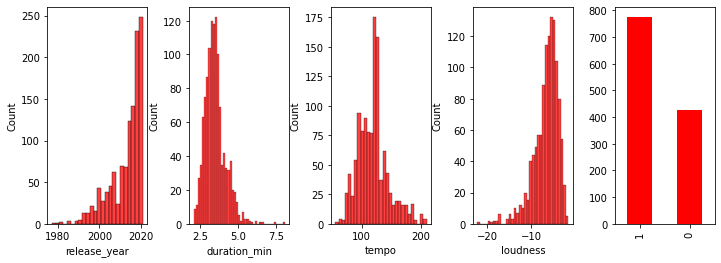

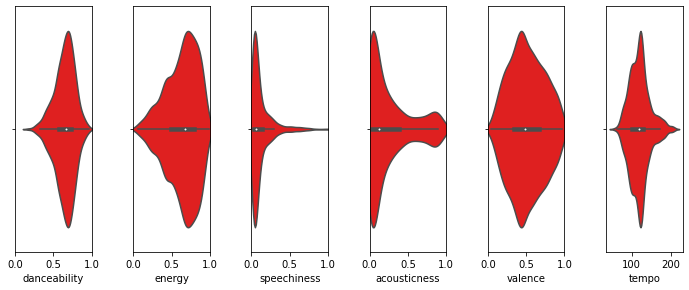

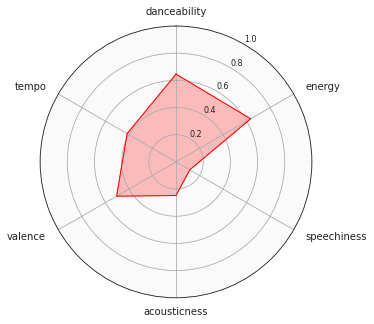

In [32]:
pop = df[df['genre']=='pop']
visualize_genre(pop, color=genre_colors['pop'])
pop.describe()

**<span style="color:orange">R&B</span>**<a id='R&B'></a>

R&B songs are also moderately danceable and energetic on average. However, despite the fact that they are the only genre whose songs are more likely to be in a minor key than a major one, they have generally high valence and are quite positive.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   248901.406667    44.749167      0.676949     0.560907    -8.457948   
std     56596.665131    22.478820      0.133213     0.156009     3.041670   
min    127000.000000     0.000000      0.256000     0.122000   -22.179000   
25%    211600.750000    39.000000      0.598750     0.452750   -10.302500   
50%    242496.000000    52.000000      0.698000     0.552000    -8.197000   
75%    279779.000000    61.000000      0.767000     0.669000    -6.166000   
max    521693.000000    82.000000      0.976000     0.988000    -0.478000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.180470      0.256515          0.021710     0.158399     0.592515   
std       0.211176      0.235280          0.112161     0.129086     0.232230   
min       0.000265      0.000056          0.000000     0.018800     0.039700   
25%       0.044745      0.063775          0.000000     0.077975     0.406000   
50%       0.085518      0.183500          0.000004     0.109000     0.618000   
75%       0.226900      0.402000          0.000211     0.194000     0.775000   
max       0.984114      0.978000          0.951000     0.943000     0.989000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    114.309486     0.512500   2000.510000      4.148357  
std      28.049259     0.500052     14.902236      0.943278  
min      54.585000     0.000000   1957.000000      2.116667  
25%      93.054250     0.000000   1992.000000      3.526679  
50%     110.750500     1.000000   2002.000000      4.041600  
75%     130.086250     1.000000   2013.000000      4.662983  
max     203.862000     1.000000   2021.000000      8.694883

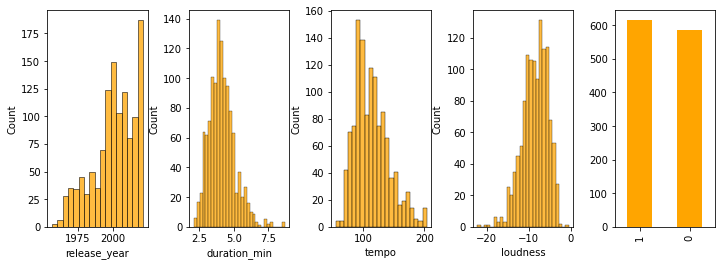

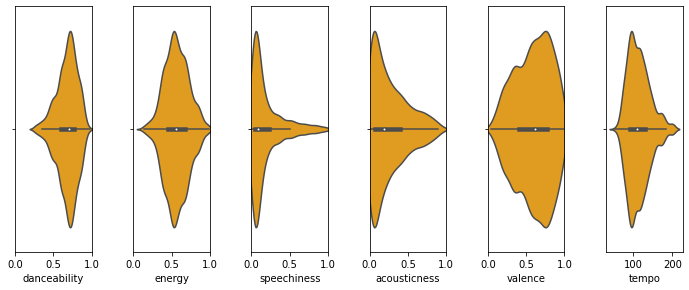

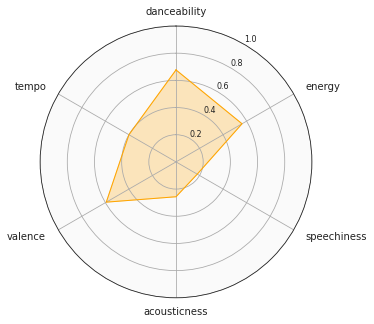

In [33]:
rnb = df[df['genre']=='r&b']
visualize_genre(rnb, color=genre_colors['r&b'])
rnb.describe()

**<span style="color:gold">Hip Hop</span>**<a id='Rap'></a>

Hip Hop songs are characterized as highly danceable, energetic, and most importantly, very speechy on average.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   231078.014167    52.248333      0.730952     0.667917    -7.273182   
std     56613.503279    17.597814      0.139784     0.148513     2.745520   
min    120133.000000     0.000000      0.198000     0.208000   -19.052000   
25%    191720.000000    42.000000      0.651000     0.557000    -8.981000   
50%    228933.000000    56.000000      0.754500     0.666000    -6.782000   
75%    263593.000000    65.000000      0.837000     0.777000    -5.289500   
max    597293.000000    88.000000      0.985000     0.997000    -1.385000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.498362      0.150984          0.008157     0.203445     0.564543   
std       0.284098      0.175115          0.063701     0.162066     0.216415   
min       0.014562      0.000022          0.000000     0.017600     0.039100   
25%       0.240138      0.024875          0.000000     0.096700     0.402500   
50%       0.512841      0.087500          0.000000     0.133000     0.576000   
75%       0.737887      0.203250          0.000018     0.275250     0.731250   
max       0.997352      0.911000          0.926000     0.941000     0.973000   

             tempo       mode  release_year  duration_min  
count  1200.000000  1200.0000   1200.000000   1200.000000  
mean    113.587698     0.5375   2008.650833      3.851300  
std      30.075769     0.4988     10.545533      0.943558  
min      56.046000     0.0000   1980.000000      2.002217  
25%      90.773250     0.0000   2000.000000      3.195333  
50%     100.924500     1.0000   2011.000000      3.815550  
75%     137.058000     1.0000   2018.000000      4.393217  
max     200.045000     1.0000   2021.000000      9.954883

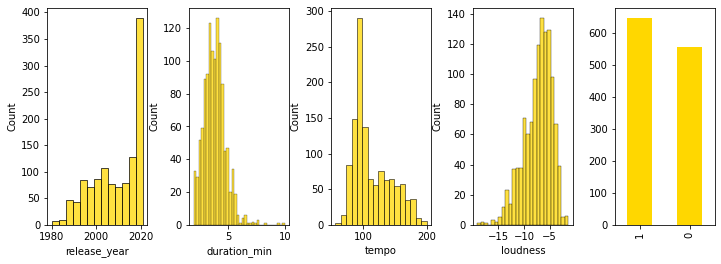

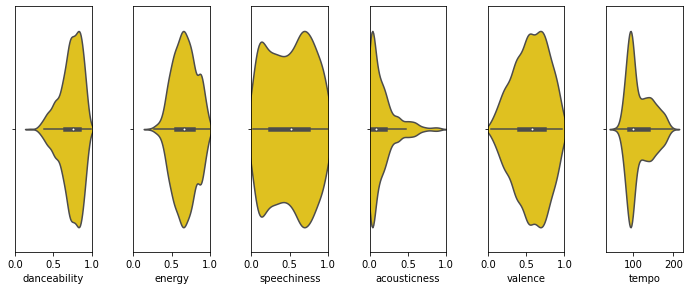

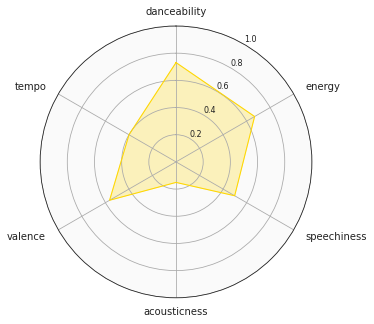

In [34]:
hiphop = df[df['genre']=='hip hop']
visualize_genre(hiphop, color=genre_colors['hip hop'])
hiphop.describe()

**<span style="color:green">Latin</span>**<a id='Latin'></a>

Latin songs are not only characterized as highly danceable, energetic, but they are also very positive on average(the only other genre with higher valence is Reggae).

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   239718.370833    53.241667      0.684834     0.664700    -6.642714   
std     62281.735652    16.724823      0.138498     0.177609     2.838691   
min    123253.000000     0.000000      0.194000     0.057900   -23.725000   
25%    199367.250000    43.000000      0.596000     0.567750    -7.905000   
50%    229233.000000    56.000000      0.714000     0.697000    -6.076500   
75%    267500.000000    66.000000      0.794000     0.790000    -4.692000   
max    598853.000000    91.000000      0.958000     0.997000    -0.432000   

       speechiness  acousticness  instrumentalness     liveness     valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.00000   
mean      0.167040      0.324656          0.016263     0.190689     0.68059   
std       0.204337      0.251012          0.095739     0.156956     0.20478   
min       0.005825      0.000157          0.000000     0.020700     0.03920   
25%       0.037066      0.098500          0.000000     0.088725     0.55500   
50%       0.073074      0.272000          0.000002     0.133000     0.71700   
75%       0.205719      0.519250          0.000092     0.258000     0.85325   
max       0.968229      0.977000          0.930000     0.961000     0.97700   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    120.559706     0.583333   2007.768333      3.995306  
std      31.796361     0.493212     11.643208      1.038029  
min      64.329000     0.000000   1954.000000      2.054217  
25%      94.012250     0.000000   2002.000000      3.322788  
50%     113.504000     1.000000   2009.000000      3.820550  
75%     139.960000     1.000000   2018.000000      4.458333  
max     214.025000     1.000000   2021.000000      9.980883

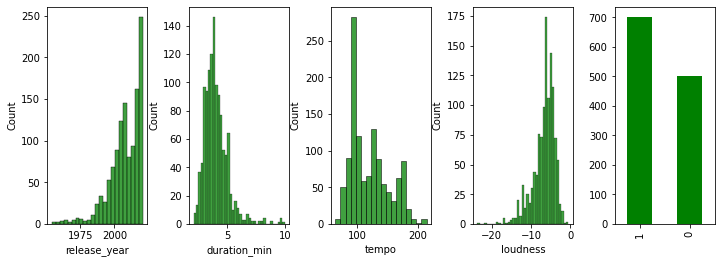

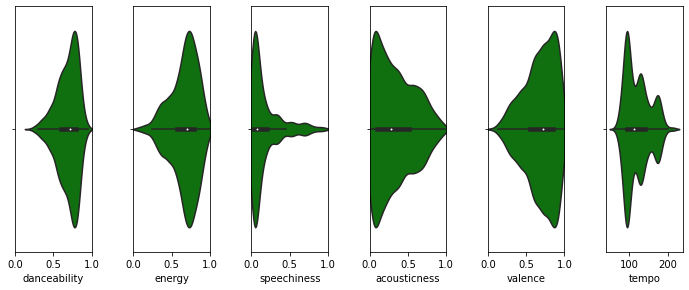

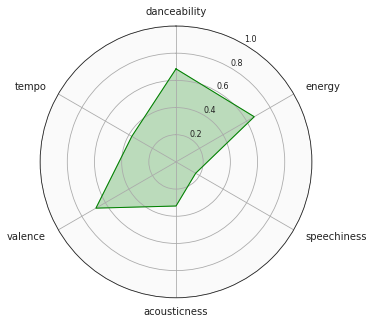

In [35]:
latin = df[df['genre']=='latin']
visualize_genre(latin, color=genre_colors['latin'])
latin.describe()

**<span style="color:lightblue">EDM</span>**<a id='EDM'></a>

EDM songs are very energetic on average (the only other genre with more energy is metal), and they also tend to have much higher tempos than other genres.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   231472.126667    45.376667      0.644035     0.822590    -5.114142   
std     79196.447128    15.870140      0.130368     0.132228     2.511523   
min    129819.000000     0.000000      0.128000     0.228000   -16.293000   
25%    181935.000000    38.000000      0.565750     0.739750    -6.369000   
50%    207998.000000    47.000000      0.641000     0.854500    -4.922000   
75%    254270.500000    56.000000      0.740250     0.929000    -3.538500   
max    594714.000000    91.000000      0.977000     0.999000     0.797000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.175374      0.058167          0.229460     0.221400     0.389553   
std       0.189110      0.108948          0.325348     0.178265     0.230918   
min       0.016150      0.000006          0.000000     0.014100     0.031800   
25%       0.058711      0.002608          0.000077     0.094275     0.201000   
50%       0.101668      0.013500          0.014000     0.150000     0.351000   
75%       0.208366      0.056425          0.476250     0.323000     0.555000   
max       0.986762      0.716000          0.973000     0.962000     0.983000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000    1200.00000   1200.000000  
mean    127.449403     0.516667    2017.04500      3.857869  
std      18.230100     0.499930       4.30737      1.319941  
min      67.636000     0.000000    1970.00000      2.163650  
25%     123.019000     0.000000    2015.00000      3.032250  
50%     126.073000     1.000000    2019.00000      3.466633  
75%     131.964750     1.000000    2020.00000      4.237842  
max     200.143000     1.000000    2021.00000      9.911900

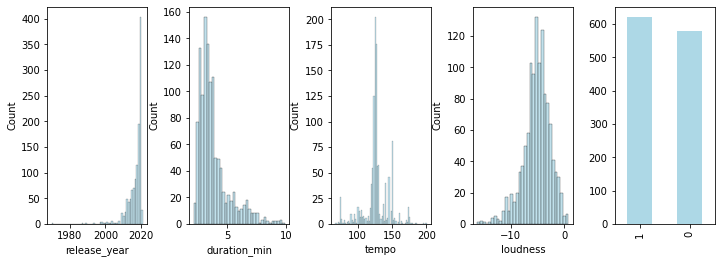

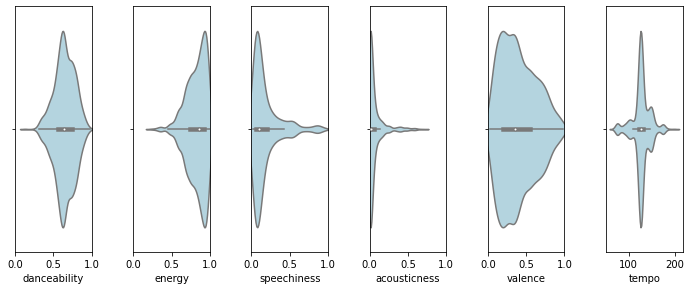

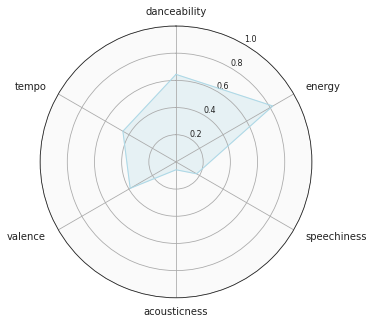

In [36]:
edm = df[df['genre']=='edm']
visualize_genre(edm, color=genre_colors['edm'])
edm.describe()

**<span style="color:blue">Reggae</span>**<a id='Reggae'></a>

Reggae songs have the highest valence on average and are generally much speechier than most other genres (the only other genre with higher speechiness is Hip Hop).

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   215408.659167    34.721667      0.731159     0.598781    -8.455988   
std     52479.438592    15.501003      0.116116     0.172526     3.383764   
min    120333.000000     0.000000      0.338000     0.071900   -22.440000   
25%    179786.000000    24.000000      0.671500     0.472750   -10.584500   
50%    209087.000000    36.000000      0.746000     0.605000    -7.824000   
75%    239960.000000    47.000000      0.813000     0.719000    -5.993250   
max    490181.000000    78.000000      0.976000     0.995000    -1.907000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.305117      0.188021          0.094402     0.164925     0.750048   
std       0.267395      0.204919          0.239455     0.134982     0.174466   
min       0.012179      0.000013          0.000000     0.018700     0.065700   
25%       0.089092      0.028700          0.000000     0.077875     0.640750   
50%       0.202012      0.109000          0.000031     0.115500     0.781000   
75%       0.454594      0.282500          0.008610     0.206250     0.890000   
max       0.994705      0.910000          0.956000     0.952000     0.994000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    117.730770     0.612500   2002.405000      3.590144  
std      33.203189     0.487383     14.216812      0.874657  
min      62.931000     0.000000   1905.000000      2.005550  
25%      86.643000     0.000000   1996.000000      2.996433  
50%     116.015000     1.000000   2006.000000      3.484783  
75%     143.019500     1.000000   2012.000000      3.999333  
max     209.498000     1.000000   2021.000000      8.169683

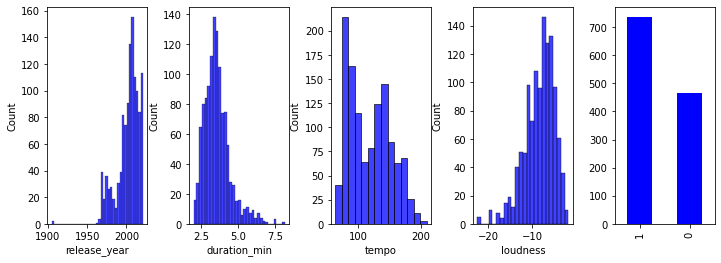

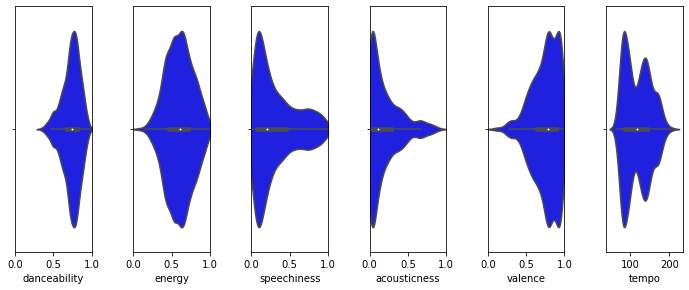

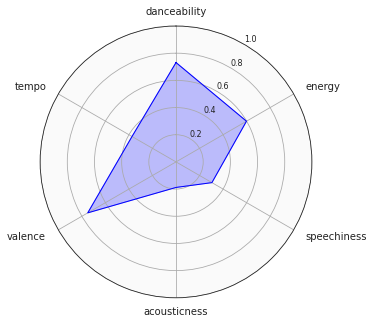

In [37]:
reggae = df[df['genre']=='reggae']
visualize_genre(reggae, color=genre_colors['reggae'])
reggae.describe()

**<span style="color:violet">Indie</span>**<a id='Indie'></a>

Indie songs are very energetic on average and are over twice as likely to be in a major key than a minor one.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   235042.792500    49.295833      0.556261     0.665447    -7.210439   
std     56608.403471    15.116781      0.132941     0.210489     3.104470   
min    121374.000000     0.000000      0.154000     0.043600   -22.849000   
25%    198962.750000    41.000000      0.473000     0.535750    -8.747500   
50%    226023.000000    52.000000      0.566000     0.709500    -6.442000   
75%    259025.500000    60.000000      0.644250     0.830250    -4.920000   
max    578040.000000    83.000000      0.969000     0.987000    -1.574000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.077965      0.229617          0.128209     0.174410     0.482876   
std       0.104748      0.302957          0.250484     0.140767     0.220764   
min       0.001589      0.000001          0.000000     0.029900     0.037900   
25%       0.025417      0.008148          0.000010     0.094575     0.317750   
50%       0.045406      0.065900          0.001490     0.117000     0.481000   
75%       0.080421      0.363000          0.097100     0.209000     0.644000   
max       1.000000      0.988000          0.970000     0.956000     0.966000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    121.559527     0.730000   2012.310833      3.917380  
std      27.574190     0.444145      7.099969      0.943473  
min      51.945000     0.000000   1977.000000      2.022900  
25%     100.975000     0.000000   2009.000000      3.316046  
50%     120.004000     1.000000   2014.000000      3.767050  
75%     139.825750     1.000000   2018.000000      4.317092  
max     209.519000     1.000000   2021.000000      9.634000

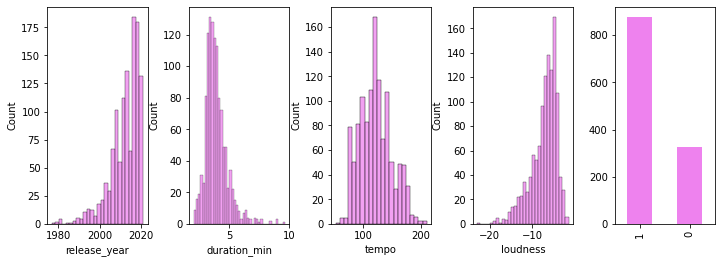

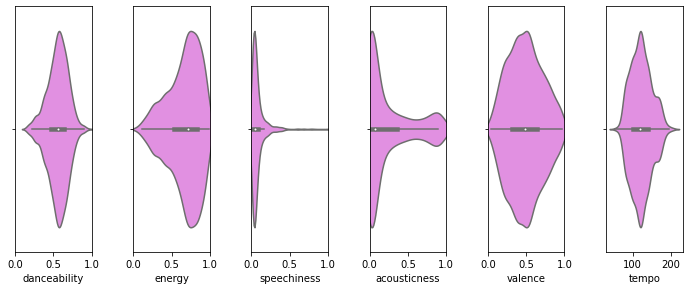

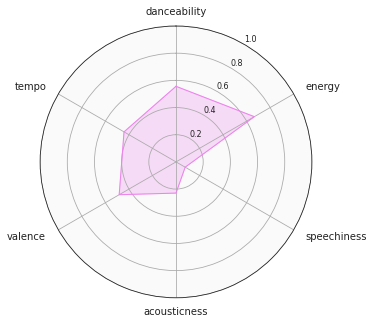

In [38]:
indie = df[df['genre']=='indie']
visualize_genre(indie, color=genre_colors['indie'])
indie.describe()

**<span style="color:Purple">Rock</span>**<a id='Rock'></a>

Rock songs are moderately danceable, energetic and valent on average. They're also three times as likely to be in a major key than a minor one.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   257428.140000    59.056667      0.515433     0.641669    -9.352322   
std     74547.061007    15.058799      0.140398     0.210021     3.675463   
min    121160.000000     0.000000      0.115000     0.024000   -26.134000   
25%    212353.250000    51.000000      0.419000     0.484500   -11.853000   
50%    246279.500000    63.000000      0.526500     0.676000    -8.904500   
75%    288506.000000    70.000000      0.615250     0.812250    -6.513000   
max    763746.000000    83.000000      0.855000     0.994000    -1.935000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.065460      0.217472          0.067037     0.179070     0.561393   
std       0.078575      0.257264          0.182291     0.148912     0.236441   
min       0.002118      0.000004          0.000000     0.026800     0.036000   
25%       0.024358      0.013000          0.000003     0.089700     0.376000   
50%       0.038920      0.115000          0.000277     0.118000     0.569000   
75%       0.073670      0.359000          0.012500     0.218000     0.760000   
max       0.814668      0.992000          0.985000     0.974000     0.977000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    122.978404     0.781667   1986.149167      4.290469  
std      28.260633     0.413287     14.210801      1.242451  
min      61.207000     0.000000   1964.000000      2.019333  
25%     100.328000     1.000000   1975.000000      3.539221  
50%     120.918500     1.000000   1983.000000      4.104658  
75%     141.128750     1.000000   1996.000000      4.808433  
max     208.571000     1.000000   2021.000000     12.729100

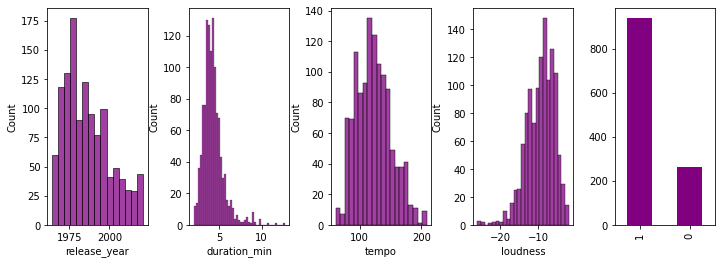

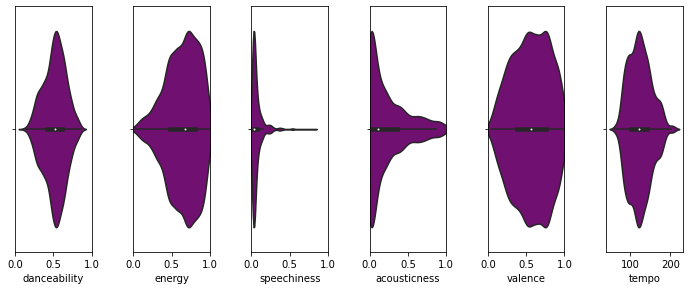

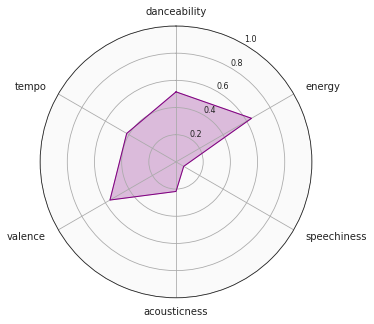

In [39]:
rock = df[df['genre']=='rock']
visualize_genre(rock, color=genre_colors['rock'])
rock.describe()

**<span style="color:brown">Metal</span>**<a id='Metal'></a>

Metal songs are the most energetic on average comparatively to other genres and are not acoustic whatsoever.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   269000.914167    38.362500      0.382145     0.888637    -6.487090   
std     76833.183304    16.929213      0.135202     0.123981     2.831917   
min    120360.000000     0.000000      0.059000     0.242000   -16.239000   
25%    216760.000000    27.000000      0.272000     0.856000    -8.133250   
50%    259760.000000    38.000000      0.383000     0.933000    -5.721000   
75%    304736.250000    49.000000      0.484000     0.971000    -4.440000   
max    584746.000000    79.000000      0.740000     1.000000    -1.431000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.178310      0.017273          0.210833     0.218696     0.331966   
std       0.144534      0.070581          0.316215     0.156673     0.193857   
min       0.005825      0.000000          0.000000     0.020500     0.014600   
25%       0.074927      0.000027          0.000122     0.099850     0.182750   
50%       0.138734      0.000236          0.010450     0.172000     0.313000   
75%       0.234842      0.002632          0.392250     0.311000     0.463500   
max       0.894096      0.804000          0.969000     0.965000     0.954000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    127.384002     0.587500   2002.252500      4.483349  
std      30.672429     0.492489     11.895026      1.280553  
min      45.132000     0.000000   1970.000000      2.006000  
25%     102.367000     0.000000   1990.000000      3.612667  
50%     120.439500     1.000000   2003.000000      4.329333  
75%     148.524000     1.000000   2013.000000      5.078937  
max     203.396000     1.000000   2021.000000      9.745767

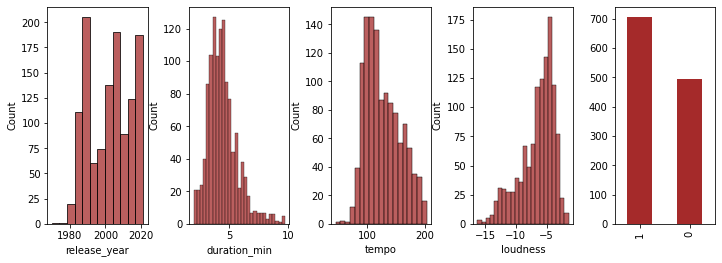

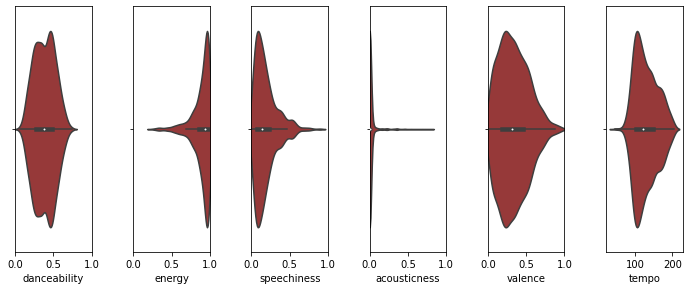

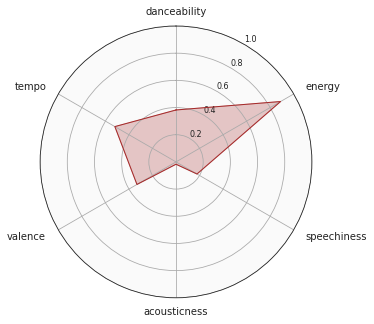

In [40]:
metal = df[df['genre']=='metal']
visualize_genre(metal, color=genre_colors['metal'])
metal.describe()

**<span style="color:tan">Country</span>**<a id='Country'></a>

Rock songs are moderately danceable, energetic and valent on average. Their features' averages resemble those of the rock genre, but there is an even smaller proportion of songs in a minor key.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   213264.797500    47.975833      0.601536     0.608509    -8.006121   
std     50602.453517    16.464340      0.119819     0.195865     3.683502   
min    123466.000000     0.000000      0.192000     0.006810   -27.119000   
25%    182220.000000    38.000000      0.523000     0.473000   -10.409500   
50%    204995.500000    50.000000      0.604000     0.639000    -6.944000   
75%    234466.500000    61.000000      0.678000     0.765000    -5.286250   
max    591693.000000    84.000000      0.949000     0.960000    -1.514000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.089282      0.291787          0.010745     0.180334     0.573658   
std       0.157181      0.268758          0.075826     0.134701     0.221116   
min       0.002383      0.000042          0.000000     0.021900     0.055600   
25%       0.019592      0.059700          0.000000     0.097950     0.392750   
50%       0.033625      0.195500          0.000000     0.129500     0.584000   
75%       0.070956      0.472250          0.000018     0.226000     0.753000   
max       0.994705      0.978000          0.953000     0.984000     0.982000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    123.044448     0.880000   2003.770833      3.554413  
std      30.426045     0.325097     16.444158      0.843374  
min      48.718000     0.000000   1958.000000      2.057767  
25%      98.001000     1.000000   1995.000000      3.037000  
50%     120.005500     1.000000   2010.000000      3.416592  
75%     144.082000     1.000000   2017.000000      3.907775  
max     206.983000     1.000000   2021.000000      9.861550

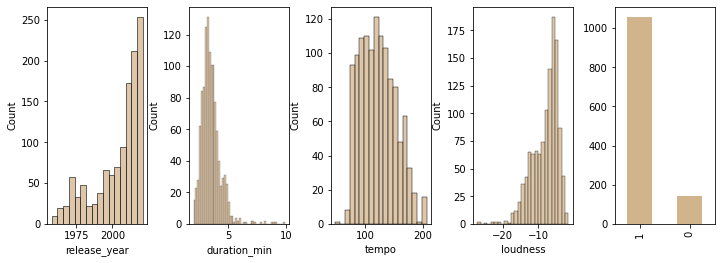

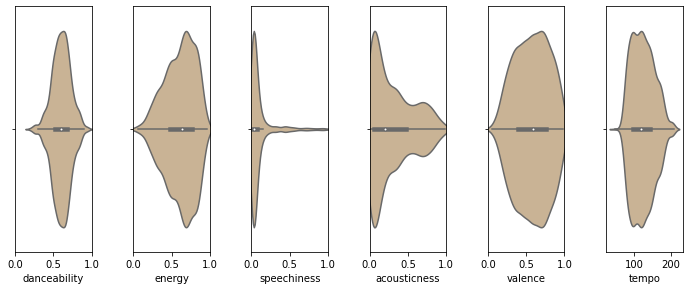

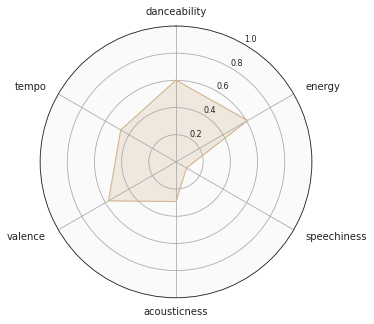

In [41]:
country = df[df['genre']=='country']
visualize_genre(country, color=genre_colors['country'])
country.describe()

**<span style="color:olive">Jazz</span>**<a id='Jazz'></a>

Jazz songs are very acoustic (the only other genre with higher acousticness is Classical), and typically, they're not energetic. Lastly, they are significantly longer than most other genres, similar to the Classical genre.

duration_ms   popularity  danceability       energy     loudness  \
count    1200.000000  1200.000000   1200.000000  1200.000000  1200.000000   
mean   319594.280000    35.265000      0.499734     0.312530   -14.876827   
std    114049.786522    15.377098      0.122181     0.210853     5.103761   
min    122613.000000     0.000000      0.142000     0.001730   -35.794000   
25%    226786.000000    24.000000      0.412000     0.144000   -18.391000   
50%    305159.500000    37.000000      0.496000     0.285000   -13.941500   
75%    395064.000000    47.000000      0.584250     0.450250   -11.153000   
max    879306.000000    66.000000      0.838000     0.948000    -3.398000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.077864      0.753813          0.486729     0.166040     0.422069   
std       0.083511      0.258177          0.372907     0.159854     0.251405   
min       0.010326      0.000103          0.000000     0.028500     0.037200   
25%       0.035743      0.651000          0.063075     0.091600     0.195750   
50%       0.051893      0.848000          0.562000     0.112000     0.395000   
75%       0.087569      0.946000          0.863000     0.159250     0.607250   
max       0.796134      0.996000          0.970000     0.989000     0.962000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    111.127656     0.554167   1989.375000      5.326571  
std      29.289120     0.497265     23.335377      1.900830  
min      41.630000     0.000000   1899.000000      2.043550  
25%      88.485000     0.000000   1966.000000      3.779767  
50%     109.837000     1.000000   1995.000000      5.085992  
75%     129.056000     1.000000   2009.000000      6.584400  
max     211.723000     1.000000   2020.000000     14.655100

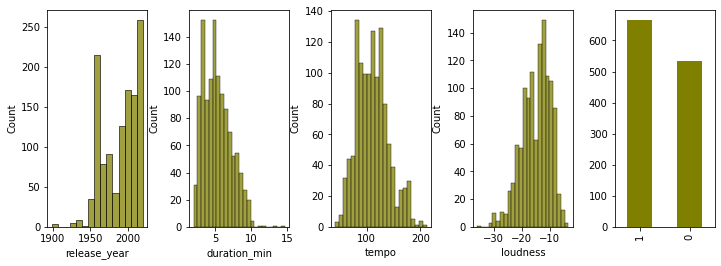

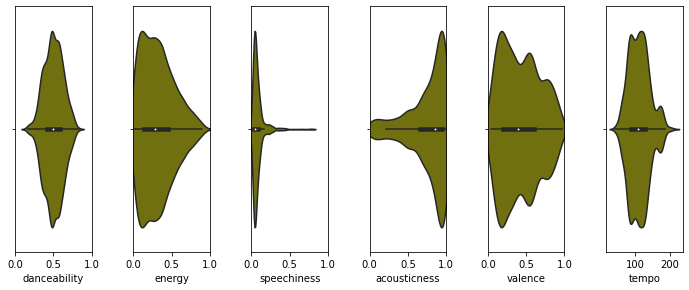

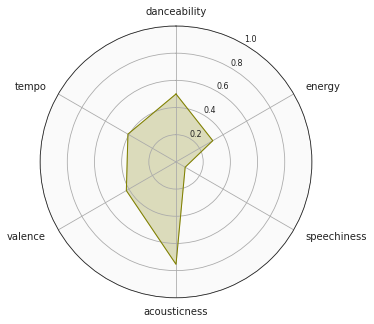

In [42]:
jazz = df[df['genre']=='jazz']
visualize_genre(jazz, color=genre_colors['jazz'])
jazz.describe()

**<span style="color:silver">Classical</span>**<a id='Classical'></a>

Classical songs are the most acoustic and the least energetic. They tend to be far longer in duration, similar to the Jazz genre. 

duration_ms   popularity  danceability       energy     loudness  \
count  1.200000e+03  1200.000000   1200.000000  1200.000000  1200.000000   
mean   3.503033e+05    20.965833      0.267684     0.104399   -23.779062   
std    1.854125e+05    16.898845      0.131744     0.098756     6.302786   
min    3.908000e+04     0.000000      0.063000     0.000277   -52.447000   
25%    2.151960e+05     7.000000      0.165000     0.031475   -27.453750   
50%    2.912800e+05    18.000000      0.246000     0.077050   -23.051000   
75%    4.281520e+05    31.000000      0.354250     0.144000   -19.384500   
max    1.177000e+06    68.000000      0.696000     0.702000    -6.136000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1200.000000   1200.000000       1200.000000  1200.000000  1200.000000   
mean      0.068365      0.942507          0.606369     0.126164     0.161383   
std       0.065537      0.079193          0.362192     0.084241     0.173801   
min       0.015886      0.353000          0.000000     0.021000     0.019200   
25%       0.046267      0.929000          0.202500     0.084100     0.038700   
50%       0.056923      0.972000          0.812500     0.102000     0.079300   
75%       0.070162      0.989000          0.900000     0.129250     0.218000   
max       0.997352      0.996000          0.994000     0.831000     0.887000   

             tempo         mode  release_year  duration_min  
count  1200.000000  1200.000000   1200.000000   1200.000000  
mean    100.411163     0.670833   2005.235000      5.838388  
std      29.259015     0.470107     13.028221      3.090209  
min      35.509000     0.000000   1949.000000      0.651333  
25%      76.682000     0.000000   1998.000000      3.586600  
50%      92.824500     1.000000   2008.000000      4.854667  
75%     120.820250     1.000000   2015.000000      7.135867  
max     203.623000     1.000000   2021.000000     19.616667

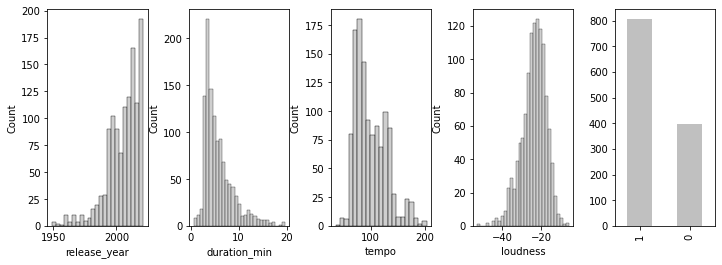

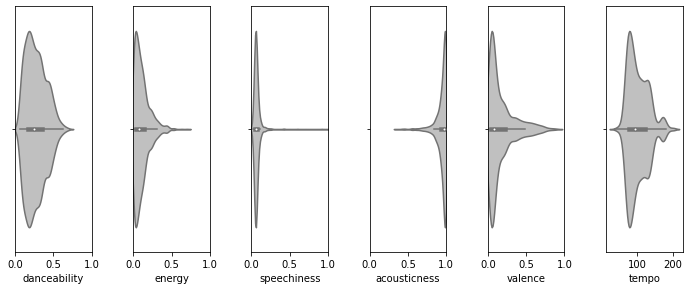

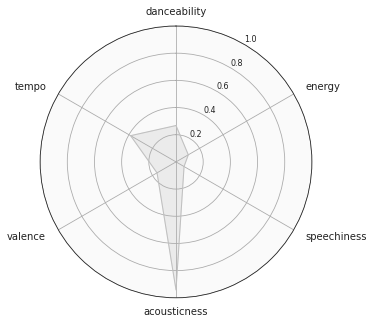

In [43]:
classical = df[df['genre']=='classical']
visualize_genre(classical, color=genre_colors['classical'])
classical.describe()

## Clustering<a id='Clustering'></a>

In [44]:
#Add at a later date

## Hypothesis Testing<a id='HypothesisTesting'></a>

A few questions arise after this initial glance. Generally, we want to know whether the features of the dataset adequately represent each genre and are able to illuminate the significant differences between them, particularly genres that share similarities:

* Are the audio features of [Rock and Country](#RockCountry) significantly different from eachother?
* Are the audio features of [Rock and Metal](#RockMetal) significantly different from eachother?
* Are the audio features of [Rap and R&B](#RapR&B) signficantly different from eachother?
* Are the audio features of Pop songs significantly different from those of songs in other popular major genres, such as [Rock](#PopRock), [Rap](#PopRap), [Latin](#PopLatin), [Indie](#PopIndie), and [Country](#PopCountry)?

### Rock vs Country<a id='RockCountry'></a>

Independent T-Tests between each pair of audio features

In [45]:
t_rock_country = stats.ttest_ind(df[df['genre']=='rock'][audio_features],
                                 df[df['genre']=='country'][audio_features])
print('Results of T-Tests between the Audio Features of Rock and Country Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_rock_country.statistic,
                    'P-Value':t_rock_country.pvalue}))

Results of T-Tests between the Audio Features of Rock and Country Music

      Audio Features  Statistic       P-Value
0      danceability -16.159666  7.757915e-56
1            energy   3.999893  6.528945e-05
2          loudness  -8.961867  6.264815e-19
3       speechiness  -4.695944  2.803524e-06
4      acousticness  -6.919499  5.794538e-12
5  instrumentalness   9.876831  1.406117e-22
6          liveness  -0.218150  8.273310e-01
7           valence  -1.312458  1.894914e-01
8             tempo  -0.055094  9.560681e-01


Logistic Regression to classify genre

In [46]:
X = df[(df['genre']=='rock') | (df['genre']=='country')].iloc[:,7:18]
y = df[(df['genre']=='rock') | (df['genre']=='country')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

     country       0.80      0.76      0.78       253
        rock       0.75      0.79      0.77       227

    accuracy                           0.78       480
   macro avg       0.77      0.78      0.77       480
weighted avg       0.78      0.78      0.78       480



### Rock vs Metal<a id='RockMetal'></a>

Independent T-Tests between each pair of audio features

In [47]:
t_rock_metal = stats.ttest_ind(df[df['genre']=='rock'][audio_features],
                                 df[df['genre']=='metal'][audio_features])
print('Results of T-Tests between the Audio Features of Rock and Metal Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_rock_metal.statistic,
                    'P-Value':t_rock_metal.pvalue}))

Results of T-Tests between the Audio Features of Rock and Metal Music

      Audio Features  Statistic        P-Value
0      danceability  23.688711  1.205899e-111
1            energy -35.078927  5.865522e-218
2          loudness -21.391471   4.651095e-93
3       speechiness -23.762560  2.910425e-112
4      acousticness  25.996527  1.790933e-131
5  instrumentalness -13.647382   6.770922e-41
6          liveness  -6.350559   2.558035e-10
7           valence  25.993501  1.904431e-131
8             tempo  -3.659217   2.584446e-04


Logistic Regression to classify genre

In [48]:
X = df[(df['genre']=='rock') | (df['genre']=='metal')].iloc[:,7:18]
y = df[(df['genre']=='rock') | (df['genre']=='metal')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

       metal       0.87      0.87      0.87       239
        rock       0.87      0.87      0.87       241

    accuracy                           0.87       480
   macro avg       0.87      0.87      0.87       480
weighted avg       0.87      0.87      0.87       480



### Hip Hop vs R&B<a id='RapR&B'></a>

Independent T-Tests between each pair of audio features

In [49]:
t_rap_rnb = stats.ttest_ind(df[df['genre']=='rock'][audio_features],
                                 df[df['genre']=='r&b'][audio_features])
print('Results of T-Tests between the Audio Features of Rap and R&B Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_rap_rnb.statistic,
                    'P-Value':t_rap_rnb.pvalue}))

Results of T-Tests between the Audio Features of Rap and R&B Music

      Audio Features  Statistic        P-Value
0      danceability -28.909355  6.401479e-158
1            energy  10.693480   4.189333e-26
2          loudness  -6.494053   1.012340e-10
3       speechiness -17.681703   7.330418e-66
4      acousticness  -3.879377   1.075447e-04
5  instrumentalness   7.336155   2.992664e-13
6          liveness   3.633408   2.855770e-04
7           valence  -3.253046   1.157596e-03
8             tempo   7.541935   6.529672e-14


Logistic Regression to classify genre

In [50]:
X = df[(df['genre']=='hip hop') | (df['genre']=='r&b')].iloc[:,7:18]
y = df[(df['genre']=='hip hop') | (df['genre']=='r&b')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

     hip hop       0.74      0.80      0.77       223
         r&b       0.81      0.75      0.78       257

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.77       480
weighted avg       0.78      0.78      0.78       480



### Pop vs Rock<a id='PopRock'></a>

Independent T-Tests between each pair of audio features

In [51]:
t_pop_rock = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='rock'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Rock Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_rock.statistic,
                    'P-Value':t_pop_rock.pvalue}))

Results of T-Tests between the Audio Features of Pop and Rock Music

      Audio Features  Statistic        P-Value
0      danceability  23.572064  1.132486e-110
1            energy  -0.855350   3.924430e-01
2          loudness  20.675984   1.576183e-87
3       speechiness  10.821128   1.117941e-26
4      acousticness   2.713425   6.706779e-03
5  instrumentalness  -8.020404   1.631584e-15
6          liveness  -4.226328   2.464240e-05
7           valence  -6.033287   1.855789e-09
8             tempo  -2.953507   3.172404e-03


Logistic Regression to classify genre

In [52]:
X = df[(df['genre']=='pop') | (df['genre']=='rock')].iloc[:,7:18]
y = df[(df['genre']=='pop') | (df['genre']=='rock')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

         pop       0.80      0.85      0.82       227
        rock       0.85      0.81      0.83       253

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



### Pop vs Latin<a id='PopLatin'></a>

Independent T-Tests between each pair of audio features

In [53]:
t_pop_latin = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='latin'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Latin Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_latin.statistic,
                    'P-Value':t_pop_latin.pvalue}))

Results of T-Tests between the Audio Features of Pop and Latin Music

      Audio Features  Statistic       P-Value
0      danceability  -7.034190  2.604276e-12
1            energy  -3.869038  1.121785e-04
2          loudness   0.438005  6.614225e-01
3       speechiness  -6.948342  4.744236e-12
4      acousticness  -7.107857  1.548166e-12
5  instrumentalness   0.668658  5.037781e-01
6          liveness  -6.174876  7.753216e-10
7           valence -20.126142  2.283446e-83
8             tempo  -0.712935  4.759551e-01


Logistic Regression to classify genre

In [54]:
X = df[(df['genre']=='pop') | (df['genre']=='latin')].iloc[:,7:18]
y = df[(df['genre']=='pop') | (df['genre']=='latin')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

       latin       0.69      0.72      0.70       230
         pop       0.73      0.70      0.72       250

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



### Pop vs Indie<a id='PopIndie'></a>

Independent T-Tests between each pair of audio features

In [55]:
t_pop_indie = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='indie'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Indie Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_indie.statistic,
                    'P-Value':t_pop_indie.pvalue}))

Results of T-Tests between the Audio Features of Pop and Indie Music

      Audio Features  Statistic       P-Value
0      danceability  16.675122  3.748055e-59
1            energy  -3.659485  2.581758e-04
2          loudness   5.117271  3.345740e-07
3       speechiness   7.545736  6.346293e-14
4      acousticness   1.483963  1.379501e-01
5  instrumentalness -14.041373  4.224737e-43
6          liveness  -3.479051  5.121680e-04
7           valence   2.424858  1.538779e-02
8             tempo  -1.690744  9.101574e-02


Logistic Regression to classify genre

In [56]:
X = df[(df['genre']=='pop') | (df['genre']=='indie')].iloc[:,7:18]
y = df[(df['genre']=='pop') | (df['genre']=='indie')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

       indie       0.75      0.69      0.72       262
         pop       0.66      0.72      0.69       218

    accuracy                           0.70       480
   macro avg       0.70      0.70      0.70       480
weighted avg       0.71      0.70      0.70       480



### Pop vs Country<a id='PopCountry'></a>

Independent T-Tests between each pair of audio features

In [57]:
t_pop_country = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='country'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Country Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_country.statistic,
                    'P-Value':t_pop_country.pvalue}))

Results of T-Tests between the Audio Features of Pop and Country Music

      Audio Features  Statistic       P-Value
0      danceability   8.697493  6.180879e-18
1            energy   3.168534  1.551387e-03
2          loudness  10.576859  1.383566e-25
3       speechiness   4.471361  8.134325e-06
4      acousticness  -3.960267  7.704765e-05
5  instrumentalness   2.263855  2.367202e-02
6          liveness  -4.747110  2.184942e-06
7           valence  -7.598287  4.274584e-14
8             tempo  -2.890397  3.882143e-03


Logistic Regression to classify genre

In [58]:
X = df[(df['genre']=='pop') | (df['genre']=='country')].iloc[:,7:18]
y = df[(df['genre']=='pop') | (df['genre']=='country')].genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

     country       0.61      0.64      0.63       232
         pop       0.65      0.62      0.64       248

    accuracy                           0.63       480
   macro avg       0.63      0.63      0.63       480
weighted avg       0.63      0.63      0.63       480



## Conclusion<a id='Conclusion'></a>

Each major genre is unique in their own way, and the combination of their subjective features are significantly different from one another. 

Pop songs are characterized as moderately danceable and energetic on average, and they're almost twice as likely to be in a major key rather than a minor one. R&B songs are also moderately danceable and energetic on average but they are the only genre whose songs are more likely to be in a minor key than a major one. Hip Hop songs are characterized as highly danceable, energetic, and most importantly, very speechy on average. Latin songs are not only characterized as highly danceable, energetic, but they are also very positive on average(the only other genre with higher valence is Reggae). EDM songs are very energetic on average (the only other genre with more energy is metal), and they also tend to have much higher tempos than other genres. Reggae songs have the highest valence on average and are generally much speechier than most other genres (the only other genre with higher speechiness is Hip Hop). Indie songs are very energetic on average and are over twice as likely to be in a major key than a minor one. Rock songs are moderately danceable, energetic and valent on average. They're also three times as likely to be in a major key than a minor one. Metal songs are the most energetic on average comparatively to other genres and are not acoustic whatsoever. Rock songs are moderately danceable, energetic and valent on average. Their features' averages resemble those of the rock genre, but there is an even smaller proportion of songs in a minor key. Jazz songs are very acoustic (the only other genre with higher acousticness is Classical), and typically, they're not energetic. Classical songs are the most acoustic and the least energetic. Lastly, Jazz and Classical songs tend to be significantly longer than most other genres.

To determine whether the audio feature representations of each genre are significantly diffferent from one another, firstly, a series of independent t-tests were conducted on each pair of audio features between the two genres. Then, a logistic regression was conducted using the audio features of the genres as the independent variables and the genres themselves as the dependent variables. For each pair of similar genres (Rock vs Country, Rock vs Metal, Hip Hop vs R&B, Pop vs Rock, Pop vs Latin, Pop vs Indie, and Pop vs Country), all of the t-tests were highly significant (p < 0.01) and the Logistic Regressions all had high accuracies. In conclusion, each genre is unique as described by its model of audio features.